In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
sns.set()

%matplotlib inline

read_csv used to read data 

In [82]:
data = pd.read_csv('iris.csv')

In [83]:
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [84]:
data.shape

(150, 5)

In [85]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
#Finding the cloumns of the dataset
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [87]:
#Finding the range of dataset
data.index

RangeIndex(start=0, stop=150, step=1)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
data.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [90]:
# Lets check all the unique species of the flower
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [91]:
# Now lets check their count in the dataset.
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [92]:
data['sepal.length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

C:\Users\dgnc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal.length', ylabel='Density'>

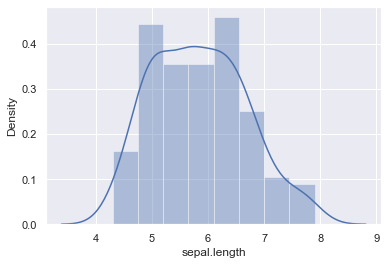

In [93]:
sns.distplot(data['sepal.length'])

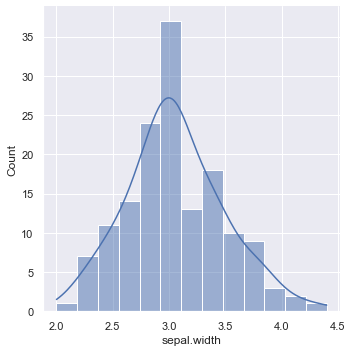

In [94]:
sns.displot(data['sepal.width'], kde=True)

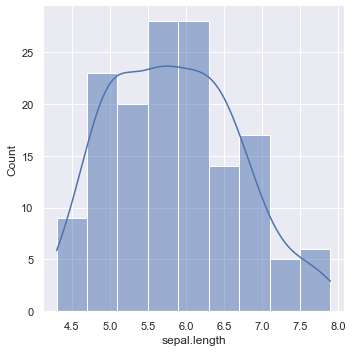

In [95]:
sns.displot(data['sepal.length'], kde=True)

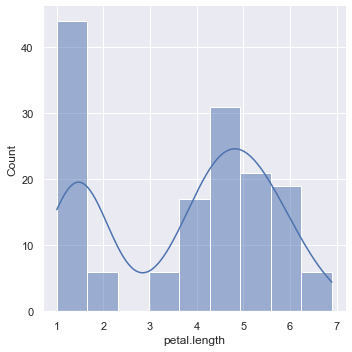

In [96]:
sns.displot(data['petal.length'], kde=True)

<AxesSubplot:title={'center':'Distribution of Sepal Length of all 3 species.'}, xlabel='variety', ylabel='sepal.length'>

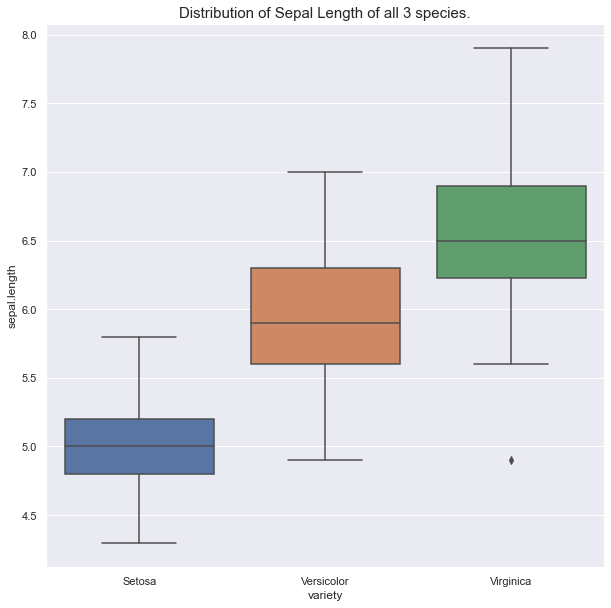

In [97]:
plt.figure(figsize= (10,10))
plt.title("Distribution of Sepal Length of all 3 species.", fontsize = 15)
sns.boxplot(x = 'variety', y = 'sepal.length', data = data)

<AxesSubplot:title={'center':'Distribution of Sepal Width of all 3 species.'}, xlabel='variety', ylabel='sepal.width'>

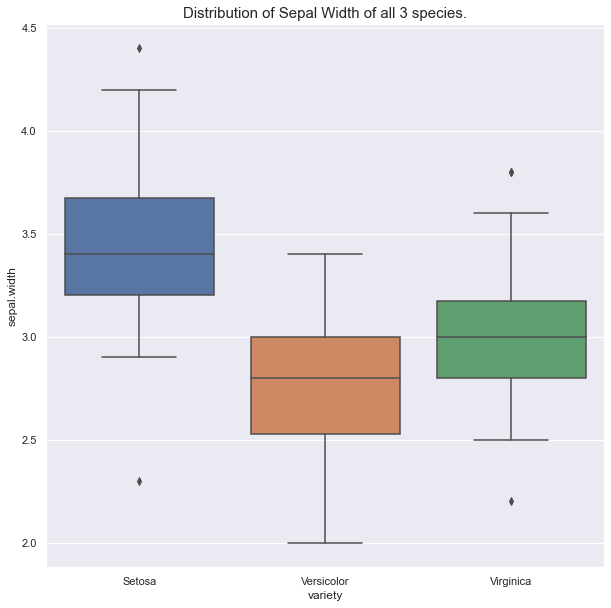

In [98]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Sepal Width of all 3 species.", fontsize = 15)
sns.boxplot(x = 'variety', y = 'sepal.width', data = data)

<AxesSubplot:title={'center':'Distribution of Sepal Width of all 3 species.'}, xlabel='variety', ylabel='petal.length'>

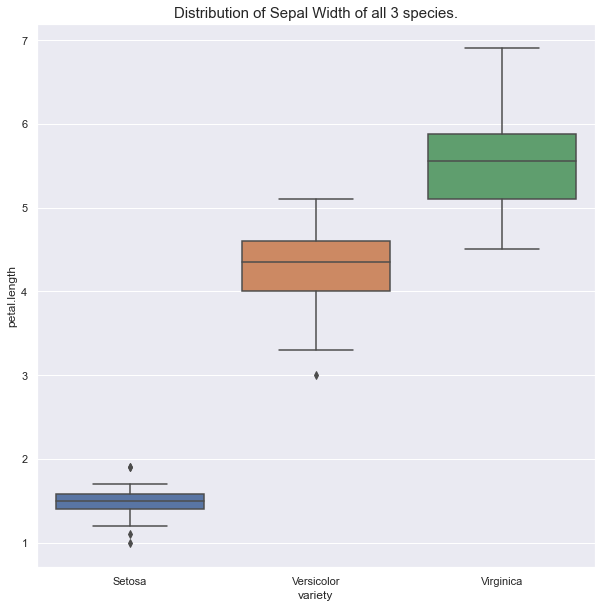

In [99]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Sepal Width of all 3 species.", fontsize = 15)
sns.boxplot(x = 'variety', y = 'petal.length', data = data)

Finding correlations.
Correlation is basically association/relation between two quantitative variables(here our features). A correlation coefficient can vary from -1 to +1. Where :

-1 = Two variables(or features) are purely negatively correlated.
0 = Two variables are independent of each other.
+1 = Two variables are purely positively correlated

In [100]:
data.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation between all the columns ')

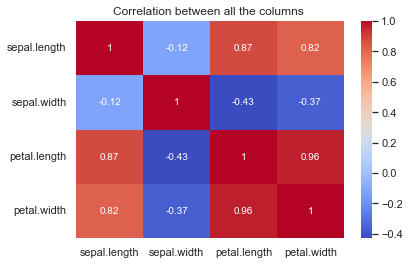

In [101]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation between all the columns ", fontsize = 12)

Building the model.
1. Logistic Regression
It's a Linear model which predicts the probabilty that a certain instance will belong to which category. Based on the probablity we decide the target class to which an instance will belong to. For ex- The probability of a certain instance to be a spam message is 0.85 then it will belong to the Spam category, else if the probability is somewhat 0.40 then it won't. Note - The rounding off of probability to binary values will depend on use case and context.


In [102]:
feature_set = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
X = data[feature_set].values

In [103]:
# Since species contains categorical features we will map the species category to 0,1 and 2 respectively.

y = data['variety'].map({'Setosa': 0 , 'Versicolor' :1 ,'Virginica' : 2 }).values

Training the dataset

In [104]:
# Splitting the dataset into the test and train part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [106]:
# Creating a classifier object and fitting the training dataset.
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\dgnc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
print(y_pred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2 1 2 1 1 1 0 0 1 0 2]


In [108]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0]
 [ 0 23  1]
 [ 0  0 18]]


Text(30.5, 0.5, 'Predicted Label')

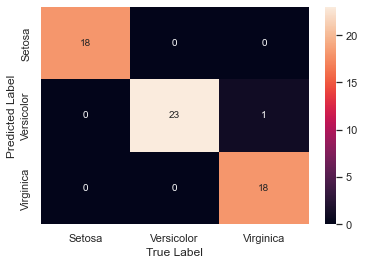

In [109]:
# converting the confusion matrix into a dataframe
cm_df = pd.DataFrame(cm, 
                    index = ['Setosa','Versicolor','Virginica'], 
                    columns = ['Setosa','Versicolor','Virginica'])
sns.heatmap(cm_df, annot = True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [110]:
acc = accuracy_score(y_test, y_pred)
acc*100

98.33333333333333

2. Decision Tree Classifier.
A decision tree classifier is a supervised classification technique and can be used in both the cases where the target label is categorical as well as continuous. The main aim of this algorithm is to split the root node(total data points) into smaller homogenous sub-nodes where homogenous sub-nodes are the ones that have all the data points belonging to only one particular target class. So, on what basis the splitting is done? The splitting is done on the basis of various algorithms, some of them are Gini, Chi-square, Information gain etc

Gini
It does only binary splits.
Higher the gini value, higher is the homogenity of the sub-node.
Advantages of a Tree based classidfier.
Easy to understand.
Less data cleaning required.
Data type is not a constraint.
Disadvantages
Overfitting
Not very good for continuous variable.

In [111]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [112]:
clf = confusion_matrix(y_test, y_pred)

In [113]:
acc = accuracy_score(y_test, y_pred)
acc*100

91.66666666666666